# Аналитика интернет-магазина. 
# Гипотезы для увеличения выручки

# Задачи проекта 

1) Приоритизировать гипотезы

2) Запустить A/B-тест и проанализировать результаты.

# Описание данных
## Данные для первой части
 Файл "/datasets/hypothesis.csv."
 
 Hypothesis — краткое описание гипотезы;
 
 Reach — охват пользователей по 10-балльной шкале;
 
 Impact — влияние на пользователей по 10-балльной шкале;
 
 Confidence — уверенность в гипотезе по 10-балльной шкале;
 
 Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
 
## Данные для второй части

 Файл "/datasets/orders.csv."
 
 transactionId — идентификатор заказа;
 
 visitorId — идентификатор пользователя, совершившего заказ;
 
 date — дата, когда был совершён заказ;
 
 revenue — выручка заказа;
 
 group — группа A/B-теста, в которую попал заказ.
 
 Файл "/datasets/visitors.csv."
 
 date — дата;
 
 group — группа A/B-теста;
 
 visitors — количество пользователей в указанную дату в указанной группе A/B-теста


In [31]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings

In [32]:
data_hypothesis = pd.read_csv('/Users/aleksandrgrisenkin/Desktop/df/8. Проверка гипотез.Оценить результаты A:B теста/8. Проверка гипотез.Оценить результаты A:B теста.csv')
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150  

In [33]:
data_hypothesis.info()
display(data_hypothesis)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [34]:
data_hypothesis.columns = map(str.lower, data_hypothesis.columns)

После первой проверки все данные в порядке, пропусков нет, дубликатов тоже, типы данных - ок .

Для удобства перевел название столбцов в нижний регистр 

In [35]:
data_hypothesis['ICE'] = (data_hypothesis['impact']*data_hypothesis['confidence'])/data_hypothesis['efforts']

In [36]:
data_hypothesis[['hypothesis','ICE']].sort_values(by = 'ICE', ascending= False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


После оценки методом ICE видим 3 лидера среди гипотезам, это 8(Запустить акцию, дающую скидку на товар), 0(Добавить два новых канала привлечения трафика), 7(Добавить форму подписки на все основные страницы)

In [37]:
data_hypothesis['RICE'] = (data_hypothesis['reach']*data_hypothesis['impact']*data_hypothesis['confidence'])/data_hypothesis['efforts']


In [38]:
data_hypothesis[['hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


После оценки методом RICE видим 1 явного лидера среди гипотезам, это 7(Добавить форму подписки на все основные страницы), хотя при оценке методом ICE была на 3 месте.

далее идет гипотеза 2(Добавить блоки рекомендаций товаров на сайт) 

и гипотеза 0 (Добавить два новых канала привлечения трафика) идет на 3 месте, а в ICE была на 2.

# Вывод 1 части 

Видим, что при учете числа пользователей, которых затронет изменение, изменилась приоритизация гипотез. 
Тут все логочино, так как добавление форми подписки на все основные страницы коснется почти всех пользователей, поэтому при применении метода RICE лидером с большим отрывом стал 7 метод, так как у него самая высокая оценка в данном критерии.

# 2 часть 

Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [39]:
orders = pd.read_csv('/Users/aleksandrgrisenkin/Desktop/df/8. Проверка гипотез.Оценить результаты A:B теста/orders.csv')

In [40]:
display(orders)
orders.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [41]:
visitors = pd.read_csv('/Users/aleksandrgrisenkin/Desktop/df/8. Проверка гипотез.Оценить результаты A:B теста/visitors.csv')

In [42]:
display(visitors)
visitors.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [43]:
round((visitors.isna().mean()*100),2)

date        0.0
group       0.0
visitors    0.0
dtype: float64

In [44]:
round((orders.isna().mean()*100),2)

transactionId    0.0
visitorId        0.0
date             0.0
revenue          0.0
group            0.0
dtype: float64

In [45]:
visitors.duplicated().sum()

0

In [46]:
orders.duplicated().sum()

0


Проблем в данных нет.
А именно: пропусков - нет.
дубликаты не обнаружены.



In [48]:
A = orders[orders['group'] == 'A'][['visitorId']]
B = orders[orders['group'] == 'B'][['visitorId']]
len(list(set(A['visitorId']) & set(B['visitorId'])))

58

Есть 58 пересечений, в рамках проекта мы оставляем все как есть.

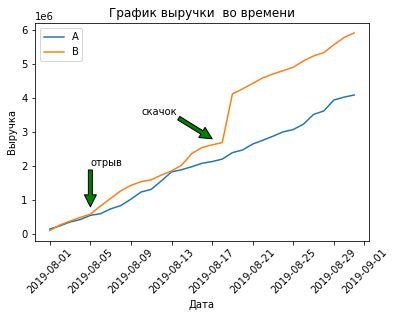

In [64]:

# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

orders = pd.read_csv('/Users/aleksandrgrisenkin/Desktop/df/8. Проверка гипотез.Оценить результаты A:B теста/orders.csv')
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

visitors = pd.read_csv('/Users/aleksandrgrisenkin/Desktop/df/8. Проверка гипотез.Оценить результаты A:B теста/visitors.csv')
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')



plt.title('График выручки  во времени')
plt.xlabel("Дата")
plt.ylabel("Выручка")
plt.legend() 
plt.annotate('скачок', xy=('2019-08-17', 2800000), xytext=('2019-08-10', 3500000),
            arrowprops=dict(facecolor='g'))
plt.annotate('отрыв', xy=('2019-08-05', 800000), xytext=('2019-08-05', 2000000),
            arrowprops=dict(facecolor='g')) 
plt.xticks(rotation=45)
plt.show()

По началу сегменты идут +- одинаково, однако после 2х недель В сегмент резко вырос с 3000000 до 4000000 и достиг в конце 6000000, когда как А сегмент равномерно распределялся и достиг 4000000.

Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

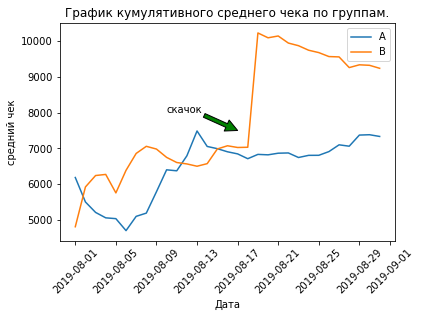

In [50]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.title('График кумулятивного среднего чека по группам.')
plt.xlabel("Дата")
plt.ylabel("средний чек")
plt.legend() 
plt.annotate('скачок', xy=('2019-08-17', 7500), xytext=('2019-08-10', 8000),
            arrowprops=dict(facecolor='g'))
plt.xticks(rotation=45)
plt.show()

Кумулятивного среднего чека по группам колеблються, но так же виден всплеск с 7000 до 10000 и идет снежение до 9000.
Нужен доолнительный анализ выбросов, которые искажают результаты. 

Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

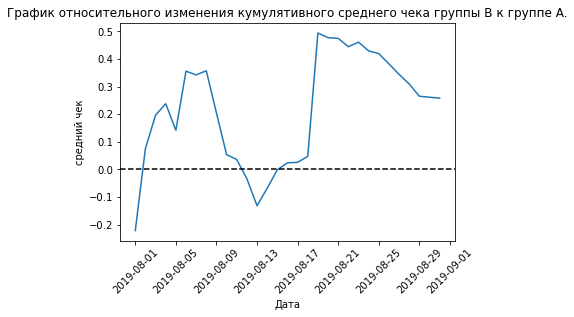

In [51]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A.')
plt.xlabel("Дата")
plt.ylabel("средний чек")
#plt.legend() 
plt.xticks(rotation=45)
plt.show()

Результаты теста резко падали на 4 недели теста, видимо тогда были совершены аномальные заказы.

Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

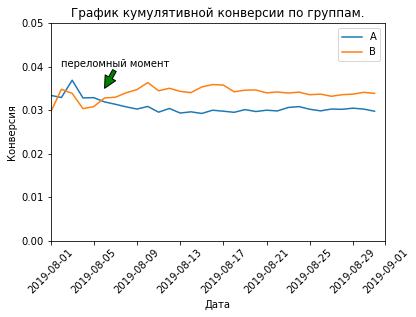

In [52]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05])

plt.title('График кумулятивной конверсии по группам.')
plt.xlabel("Дата")
plt.ylabel("Конверсия")
#plt.legend() 
plt.annotate('переломный момент', xy=('2019-08-06', 0.035), xytext=('2019-08-02', 0.04),
            arrowprops=dict(facecolor='g'))
plt.xticks(rotation=45)
plt.show()

После 1 недели конверсия сегмента В стала выше конверсии А и закрепилась на уровне 35%.

Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

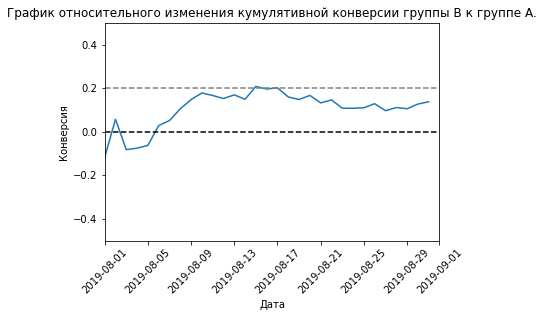

In [53]:
cumulativeData['conversion'] = (
    cumulativeData['orders'] / cumulativeData['visitors']
)

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-08-1", '2019-09-1', -0.5, 0.5])

plt.title('График относительного изменения кумулятивной конверсии группы B к группе A.')
plt.xlabel("Дата")
plt.ylabel("Конверсия")
plt.xticks(rotation=45)
plt.show()


Со второй недели конверсия сегмента В опережает сегмента А. Доходит до 20% прироста относительно группы А к середине теста и в последние 3 недели устанваливается на уровне 15-17%.

Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [54]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['userId', 'orders']

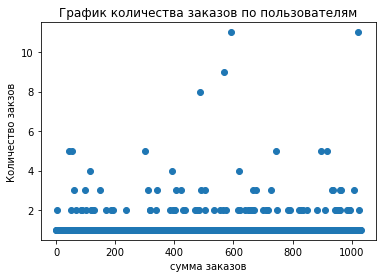

In [55]:
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('График количества заказов по пользователям')
plt.xlabel("сумма заказов")
plt.ylabel("Количество закзов")
plt.show()


Пользователей заказавших больше 2х раз не много, нужно посчитать процентили, чтобы ответить на вопрос анамалия ли это.

Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [56]:
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 2., 4.])

5% делали больше 2х заказов и не более  1% делали больше 4 заказов 

Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

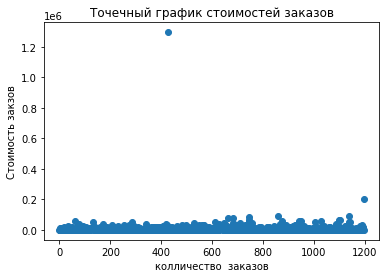

In [57]:
y_values = pd.Series(range(0, len(orders)))

plt.scatter(y_values, orders['revenue']) 
plt.title('Точечный график стоимостей заказов')
plt.xlabel("колличество  заказов")
plt.ylabel("Стоимость закзов")
plt.show()


In [58]:
np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

90% заказов были в районе 18168, 5% делали больше 28000  и не более 1% делали больше 58233.2.

Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

__Комментарий от студента №2__

Проверим 2 гипотезы:

Гипотеза 1:
    
Нулевая гипотеза: Вероятность того, что наблюдение из популяции А превышает наблюдение из популяции В равна 50%
    
Обратная гипотеза:  Вероятность того, что наблюдение из популяции А превышает наблюдение из популяции В не равна 50%
    
Гипотеза 2:    
Нулевая гипотеза: Вероятность того, что наблюдение из популяции А превышает наблюдение из популяции В по среднему чеку  равна 50%
    
Обратная гипотеза: Вероятность того, что наблюдение из популяции А превышает наблюдение из популяции В по среднему чеку  не равна 50%
    

In [59]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

 
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
 
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
 
display("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
 
display("{0:.3f}".format(sampleB.mean() / sampleA .mean() - 1))
 
 


'0.00840'

'0.138'

p-value значительно меньше 0.05, значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем.

Относительный прирост конверсии группы В к конверсии группы А равен 13,8%.

Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

In [60]:

display('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
display('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

'0.365'

'0.259'

P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B выше среднего чека группы A  почти на 26%.

Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

In [61]:

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] >  28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.00652
0.173


p-value  меньше 0.05, значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем.

Относительный прирост конверсии группы В к конверсии группы А увеличился и равен 17,3%.

Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [62]:


print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.369
0.020


После удаления выбросов в данных стало меньше шума. 

P-value увеличился,  а разница между сегментами что в среднем чеке сократилась с 26% до 2%.

Что подверждает гипотезу


# Итог:

Есть статистически значимые различия по конверсии между группами по «сырым», и по данным после фильтрации аномалий;
Что подверждает увелечение разницы коверсии после фильтрации до 17,3%

Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий. После фильтрации процент различия среднего чека сократился до 2%.

График различия конверсии между группами сообщает, что результаты группы А хуже группы В и нет значительной тенденции к улучшению:

График различия среднего чека по сырым данным говорит о том, что результаты группы B в какой то момент ухудшился до -15%,  но потом вернулся на свои показатели и остановился на уровне 26%, скорее всего в группе А была анамалия. 

Исходя из обнаруженных фактов, тест следует остановить. Продолжать смысла нет, так как данные остановились примерно на одном уровне. Победу одерживает группа В, так как несмотря на (практически) отсутсвие разницы в среднем чеке( в чистых данных), процент конверсии больше на 20,5 процентов у группы В. 